In [1]:
''' # 클래스 5 
옥외누수, 옥내누수, 기계_전기음, 환경음, 정상음
out, in, noise, other, normal 
''';

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd

'/home/user/a_python_example_50/신경회로특론/project_1'

In [4]:
PATH =  '/home/user/a_python_example_50/신경회로특론/project_1'

data = pd.read_csv(os.path.join(PATH, '1.누수감지데이터-통합(leaks-all).csv'), encoding='utf-8')

In [5]:
pd_data = pd.DataFrame(data)

In [6]:
pd_data.head()

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-2711010100,S-0359369084021423,20200903,90,695,out,0,3,0,3,...,280,741,280,469,270,813,280,644,270,250
1,S-2711010100,S-0359369084021423,20200907,90,261,out,0,5,4,4,...,280,629,280,212,270,234,270,355,270,223
2,S-2711010100,S-0359369084044425,20200704,90,747,out,0,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,S-2711010100,S-0359369084044425,20200705,90,747,out,0,6,6,6,...,410,758,410,857,420,650,410,907,410,631
4,S-2711010100,S-0359369084044425,20200706,90,825,out,0,6,6,6,...,410,771,410,622,410,894,420,775,410,918


In [7]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78204 entries, 0 to 78203
Columns: 539 entries, site to MAX19
dtypes: int64(536), object(3)
memory usage: 321.6+ MB


In [8]:
pd_data = pd_data.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1)

In [9]:
pd_data.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,out,0,3,0,3,3,3,3,5,5,...,280,741,280,469,270,813,280,644,270,250
1,out,0,5,4,4,3,4,4,6,4,...,280,629,280,212,270,234,270,355,270,223
2,out,0,6,6,6,6,6,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,out,0,6,6,6,6,6,6,8,8,...,410,758,410,857,420,650,410,907,410,631
4,out,0,6,6,6,6,6,6,6,6,...,410,771,410,622,410,894,420,775,410,918


In [10]:
# data_type별 데이터프레임 작성 

out_data = pd_data[pd_data['leaktype']=='out']
in_data = pd_data[pd_data['leaktype']=='in']
noise_data = pd_data[pd_data['leaktype']=='noise']
other_data = pd_data[pd_data['leaktype']=='other']
normal_data = pd_data[pd_data['leaktype']=='normal']

In [11]:
data_set = [out_data, in_data, noise_data, other_data, normal_data]

In [12]:
for i in data_set:
    print(i.shape)

(21923, 534)
(16591, 534)
(6287, 534)
(8775, 534)
(24628, 534)


In [13]:
pd_data['leaktype'].value_counts()

normal    24628
out       21923
in        16591
other      8775
noise      6287
Name: leaktype, dtype: int64

In [14]:
import plotly.graph_objs as go
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 로깅 off
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [15]:
out_data.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,out,0,3,0,3,3,3,3,5,5,...,280,741,280,469,270,813,280,644,270,250
1,out,0,5,4,4,3,4,4,6,4,...,280,629,280,212,270,234,270,355,270,223
2,out,0,6,6,6,6,6,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,out,0,6,6,6,6,6,6,8,8,...,410,758,410,857,420,650,410,907,410,631
4,out,0,6,6,6,6,6,6,6,6,...,410,771,410,622,410,894,420,775,410,918


data_set_name = ['out_data', 'in_data', 'noise_data', 'other_data', 'normal_data']

for index, i in enumerate(data_set):
    feature = i.columns[1:]
    print(data_set_name[index])
        
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=feature,
            y=i[feature],
            name=data_set_name[index]
        )
    )
    fig.show()

In [16]:
# 소인수분해 
def factorization(x): 
    d = 2 
    while d <= x: 
        if x % d == 0: 
            print(d) 
            x = x / d 
        else: 
            d = d + 1

In [17]:
factorization(533)

13
41


In [18]:
gr_mu = pd_data.groupby('leaktype').mean().iloc[:, :]
gr_mu

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
leaktype,,,,,,,,,,,,,,,,,,,,,
in,0.0,6.506118,6.734073,7.149659,7.999337,8.874390,14.131818,8.641673,9.171298,9.938461,...,577.537822,507.115243,573.488638,507.076306,571.116268,507.468869,572.463986,507.027425,573.509734,506.964378
noise,0.0,4.490218,5.052330,5.644664,6.267695,6.602195,30.818992,7.352155,7.749165,8.579450,...,351.431525,589.669159,353.100048,591.773660,351.107046,589.430094,350.270399,592.897725,349.799586,587.605694
normal,0.0,4.264902,4.434181,4.629365,4.708503,4.817647,5.456797,4.925816,5.179430,5.576864,...,433.523632,163.314033,428.017703,162.912660,428.802582,161.144713,448.411158,162.961791,438.012019,159.847978
other,0.0,5.351681,5.761937,6.296752,6.354416,6.577208,13.128547,7.450940,7.896752,9.375157,...,556.617664,527.453447,552.667806,523.429060,563.097436,525.265071,560.455840,526.025641,559.381197,522.852080
out,0.0,5.714318,6.013319,6.373535,6.853761,7.376591,8.590385,8.069698,8.778406,10.258861,...,565.672125,528.959449,559.498700,529.292113,559.768736,529.614286,558.628381,529.832870,565.282124,526.601241


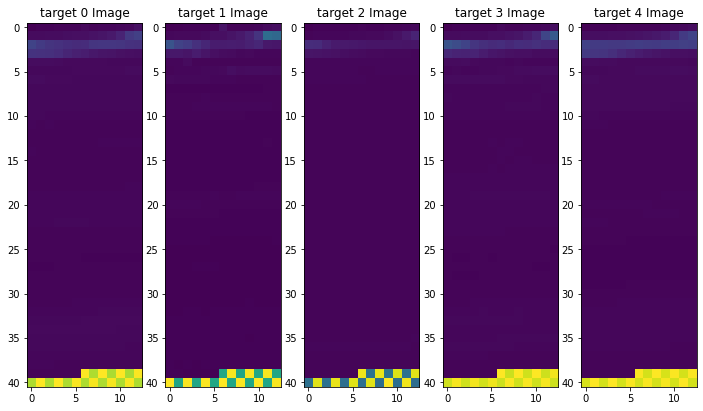

In [19]:
f, a = plt.subplots(1, 5, figsize = (12, 8))
for i in range(5):
    a[i].set_title(f'target {i} Image')
    a[i].imshow(np.array(gr_mu.iloc[i]).reshape(41, 13))

In [20]:
X = pd_data.iloc[:, 1:]
y = pd_data.iloc[:, :1]

In [21]:
X.shape

(78204, 533)

In [22]:
for index, i in enumerate(y.values):
    if i == 'out':
        i = 0
        #print('out 시작')
        y.values[index] = i
    elif i == 'in':
        i = 1
        #print('out 시작')
        y.values[index] = i
    elif i == 'noise':
        i = 2
        #print('out 시작')
        y.values[index] = i
    elif i == 'other':
        i = 3
        #print('out 시작')
        y.values[index] = i
    elif i == 'normal':
        i = 4
        #print('out 시작')
        y.values[index] = i
    else:
        print('error', i, index)

In [23]:
#scaleing
from sklearn.preprocessing import RobustScaler
sc= RobustScaler()
X = sc.fit_transform(X)
# y = sc.fit_transform(y)

X = np.array(X).reshape(-1, 41, 13, 1)
y = np.array(y['leaktype'])

In [24]:
X.shape

(78204, 41, 13, 1)

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn.functional as F 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))
y_train=np.vstack(y_train).astype(np.float)
y_test=np.vstack(y_test).astype(np.float)

######################## train ########################
X_train = torch.tensor(X_train, dtype=torch.float32).to("cuda:0")
y_train = torch.tensor(y_train, dtype=torch.float32).to("cuda:0")

Data_set_train = TensorDataset(X_train, y_train)

######################## test #########################
X_test = torch.tensor(X_test, dtype=torch.float32).to("cuda:0")
y_test = torch.tensor(y_test, dtype=torch.float32).to("cuda:0")

Data_set_test = TensorDataset(X_test, y_test)

/tmp/ipykernel_1137212/3017868821.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train=np.vstack(y_train).astype(np.float)
/tmp/ipykernel_1137212/3017868821.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test=np.vstack(y_test).astype(np.float)


In [27]:
NUM_TRAIN = 60000  ## X * 0.8 = 62563 
NUM_TEST = 15641 ## x * 0.2 = 15641


loader_train = DataLoader(Data_set_train, batch_size=64, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN))) # total 61563 num


loader_val = DataLoader(Data_set_train, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 62563)))  # total 2563 num


loader_test = DataLoader(Data_set_test, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TEST)))  # total 15641 num


In [28]:
for a, b in Data_set_train:
    print(a.size())
    break

torch.Size([1, 41, 13])


In [29]:
for a, b in Data_set_test:
    print(a.size())
    break

torch.Size([1, 41, 13])


In [30]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [31]:
import torch.nn.functional as F 

In [32]:

# vanising grad 인가 ?
# grad의 평균을 출력한다. 
def plot_grad_flow(named_parameters):
    '''Plots the gradients flowing through different layers in the net during training.
    Can be used for checking for possible gradient vanishing / exploding problems.
    
    Usage: Plug this function in Trainer class after loss.backwards() as 
    "plot_grad_flow(self.model.named_parameters())" to visualize the gradient flow'''
    ave_grads = []
    #max_grads= []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
            #max_grads.append(p.grad.abs().max())
    #plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.1, lw=1, color="c")
    #plt.bar(np.arange(len(max_grads)), ave_grads, alpha=0.1, lw=1, color="b")
    plt.plot(ave_grads, alpha=0.3, color='b')
    plt.hlines(0, 0, len(ave_grads)+1, lw=2, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    
    #plt.ylim(bottom = -0.001, top=0.02) # zoom in on the lower gradient regions
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
#     plt.legend([Line2D([0], [0], color="c", lw=4),
#                 Line2D([0], [0], color="b", lw=4),
#                 Line2D([0], [0], color="k", lw=4)], ['max-gradient', 'mean-gradient', 'zero-gradient'])

In [33]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

In [34]:
def random_weight(shape):
    """
    Create random Tensors for weights; setting requires_grad=True means that we
    want to compute gradients for these Tensors during the backward pass.
    We use Kaiming normalization: sqrt(2 / fan_in)
    """
    if len(shape) == 2:  # FC weight
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) # conv weight [out_channel, in_channel, kH, kW]
    # randn is standard normal distribution generator. 
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# create a weight of shape [3 x 5]
# you should see the type `torch.cuda.FloatTensor` if you use GPU. 
# Otherwise it should be `torch.FloatTensor`
random_weight((3, 5))

tensor([[ 1.1099,  0.7854,  0.1103,  0.7589,  0.1561],
        [ 0.8605,  0.9496, -0.0673,  1.6827, -0.1256],
        [-1.0314, -0.5974,  0.1808,  1.3487,  0.6838]], device='cuda:0',
       requires_grad=True)

In [35]:
class Flatten(nn.Module):
    def forward(self, x):
#         print(x.size())
        return flatten(x)

In [36]:
def check_accuracy_part34(loader, model):
    if loader == loader_val:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            
            y = y.squeeze()
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [37]:
def train_part34(model, optimizer, epochs=1):
    num_correct = 0
    
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)

            
            y = y.squeeze() # [64,] not [64,1] 

            loss = F.cross_entropy(scores, y)  # cross_entropy 사용시에는 항상 확률분포로 들어가야함, .float()으로 

            optimizer.zero_grad()
            
            loss.backward()
                    
            optimizer.step()
            
            if t % print_every == 0:
                print(plot_grad_flow(model.cpu().named_parameters()));
                model = model.to(device)
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                print()

None
Iteration 0, loss = 1.6353
Checking accuracy on validation set
Got 716 / 2563 correct (27.94)

None
Iteration 100, loss = 1.2830
Checking accuracy on validation set
Got 1426 / 2563 correct (55.64)

None
Iteration 200, loss = 0.9226
Checking accuracy on validation set
Got 1453 / 2563 correct (56.69)

None
Iteration 300, loss = 0.9784
Checking accuracy on validation set
Got 1530 / 2563 correct (59.70)

None
Iteration 400, loss = 0.8584
Checking accuracy on validation set
Got 1587 / 2563 correct (61.92)

None
Iteration 500, loss = 0.9455
Checking accuracy on validation set
Got 1626 / 2563 correct (63.44)

None
Iteration 600, loss = 0.8484
Checking accuracy on validation set
Got 1681 / 2563 correct (65.59)

None
Iteration 700, loss = 0.8936
Checking accuracy on validation set
Got 1688 / 2563 correct (65.86)

None
Iteration 800, loss = 0.7558
Checking accuracy on validation set
Got 1717 / 2563 correct (66.99)

None
Iteration 900, loss = 0.6665
Checking accuracy on validation set
Got 17

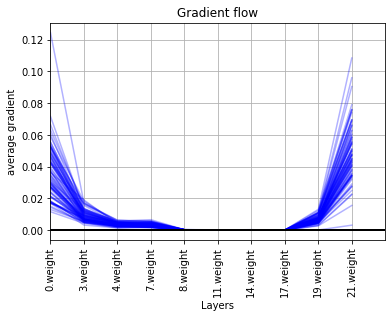

In [38]:
model = None
optimizer = None


# channel
ch_1, ch_2, ch_3, ch_4, ch_5 = 32, 128, 256, 256, 128

# hidden
h_1, h_2 = 64, 64

# num_classese
num_classes = 5

# learning Rate
lr = 1e-2

input_ch = 1
drop_out = 0.2 

model = nn.Sequential(
    nn.Conv2d(input_ch, ch_1, 2, padding=1), # 43 * 15
    nn.ReLU(inplace=True), ## 1
    nn.Dropout2d(p=drop_out),
    nn.BatchNorm2d(ch_1),
    
    nn.Conv2d(ch_1, ch_2, 1, padding=1), # 44 * 16
    nn.ReLU(inplace=True), ## 2
    nn.Dropout2d(p=drop_out),
    nn.BatchNorm2d(ch_2),
    
    nn.Conv2d(ch_2, ch_3, 4, padding=1), # 46 * 18
    nn.ReLU(inplace=True), ## 3
    nn.Dropout2d(p=drop_out),
    
    nn.Conv2d(ch_3, ch_4, 3, padding=1), # 45 x 17
    nn.ReLU(inplace=True),
    nn.Dropout2d(p=drop_out),
    
    nn.Conv2d(ch_4, ch_5, 3, padding=1), #45 x 17
    nn.ReLU(inplace=True),
    
    
    Flatten(),  ## Full-connection 
    nn.Linear(ch_5*43*15, h_1),        # 43 * 15
    nn.ReLU(inplace=True),
    
    
    nn.Linear(h_1, h_2),
    nn.ReLU(inplace=True),

    nn.Linear(h_2, num_classes)  #  5 * 64 
    #nn.Softmax(inplace=True)
)


optimizer = optim.Adam(model.parameters())


train_part34(model, optimizer, epochs=8)

In [39]:
model

Sequential(
  (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Dropout2d(p=0.2, inplace=False)
  (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
  (5): ReLU(inplace=True)
  (6): Dropout2d(p=0.2, inplace=False)
  (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Dropout2d(p=0.2, inplace=False)
  (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Dropout2d(p=0.2, inplace=False)
  (14): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Flatten()
  (17): Linear(in_features=82560, out_features=64, bias=True)
  (18): ReLU(inplace=True)
  (19): Linear(in_features=64, out_features

In [40]:
best_model = model
check_accuracy_part34(loader_test, best_model)

Checking accuracy on test set
Got 14067 / 15641 correct (89.94)


In [41]:
class BasicBlock(nn.Module):

    def __init__(self, in_channel, out_channel, stride=1): #stride =2 로 할경우, 특징맵의 사이즈를 줄인다. 
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channel, 
                               out_channel, 
                               kernel_size=3, 
                               stride=stride, 
                               padding=1, 
                               bias=False
                              )
        
        self.bn1 = nn.BatchNorm2d(out_channel)
        
        self.conv2 = nn.Conv2d(out_channel, 
                               out_channel, 
                               kernel_size=3,
                               stride=1, 
                               padding=1, 
                               bias=False
                              )
        
        self.bn2 = nn.BatchNorm2d(out_channel)

        self.shortcut = nn.Sequential()
        if in_channel != out_channel: # 1block 32x32 16개 16X16 32개 
            self.shortcut = nn.Sequential(
                
                nn.Conv2d(in_channel, 
                          out_channel,
                          kernel_size=1, 
                          stride=stride, # stride 는 여기서 차원 줄이기 위해 인자로 받음 
                          bias=False
                         ),
                nn.BatchNorm2d(out_channel)
                
            )
            

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x))) #32x32 -> 16x16
        out = self.bn2(self.conv2(out))
        short_out = self.shortcut(x) #32x32 -> 16x16  
        out += short_out  ## +를 하기 위해선 같은 차원을 가져야 함. 
        out = F.relu(out)
        return out

In [42]:
class MY_ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=5):
        super(MY_ResNet, self).__init__()
        self.in_channel = 16

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1, bias=False)  # 1번째 레이어는 고정, 
        self.bn1 = nn.BatchNorm2d(16) 
        
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1) # 32x32 num_blocks가 논문에서 n
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=1) # 16x16
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=1) # 8x8
        self.linear = nn.Linear(1920, num_classes) # 1920 == 64 * 30 * 10 

    def _make_layer(self, block, channel, num_blocks, stride):
        """
        block: BasicBlock
        channel: feature map수 3 -> (16 -> 32 -> 64)
        num_blocks: 2n -> n을 뜻함
        stride: 32x32 -> 16x16(stride=2)첫번째 레이어에서만 2로해야함 나머지는 1 16x16을 고정하기 위해 -> 8x8 
        """
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channel, channel, stride)) # 16 -> 32 #32 -> 32
            self.in_channel = channel
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 4) # 64, 64, 10, 3 
        
        out = out.view(out.size(0), -1) # reshape, view out.size(0) -> batch_size -1 남는애
        #print(out.shape) # 1920 == 64(h1) * 10 * 3 
        out = self.linear(out)
        
        return out # [bach, 10]

In [43]:
model = None

def ResNet20():
    return MY_ResNet(BasicBlock, [3, 3, 3])
model = ResNet20()

In [44]:
model

MY_ResNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

None
Iteration 0, loss = 1.6248
Checking accuracy on validation set
Got 586 / 2563 correct (22.86)

None
Iteration 100, loss = 0.9546
Checking accuracy on validation set
Got 1433 / 2563 correct (55.91)

None
Iteration 200, loss = 1.1840
Checking accuracy on validation set
Got 1499 / 2563 correct (58.49)

None
Iteration 300, loss = 1.0608
Checking accuracy on validation set
Got 1516 / 2563 correct (59.15)

None
Iteration 400, loss = 0.9520
Checking accuracy on validation set
Got 1536 / 2563 correct (59.93)

None
Iteration 500, loss = 0.9907
Checking accuracy on validation set
Got 1551 / 2563 correct (60.52)

None
Iteration 600, loss = 0.9699
Checking accuracy on validation set
Got 1576 / 2563 correct (61.49)

None
Iteration 700, loss = 0.9551
Checking accuracy on validation set
Got 1559 / 2563 correct (60.83)

None
Iteration 800, loss = 0.7554
Checking accuracy on validation set
Got 1637 / 2563 correct (63.87)

None
Iteration 900, loss = 0.7759
Checking accuracy on validation set
Got 16

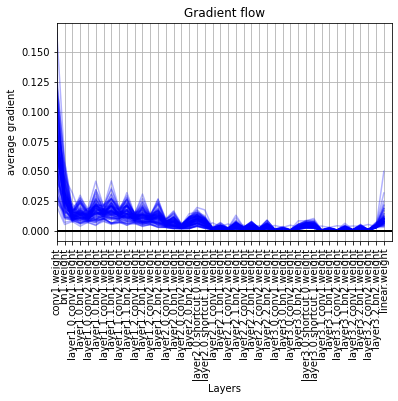

In [45]:
model = None
optimizer = None


# num_classese
num_classes = 5

# learning Rate
lr = 1e-2

input_ch = 1
drop_out = 0.2 

model = ResNet20()

optimizer = optim.Adam(model.parameters())


train_part34(model, optimizer, epochs=8)

In [46]:
best_model = model
check_accuracy_part34(loader_test, best_model)

Checking accuracy on test set
Got 13894 / 15641 correct (88.83)


In [249]:
model.layer1 # 레이어 3까지 있음, 이런것들이 모듈이라고 함

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
  (1): BasicBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
  (2): BasicBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum

In [211]:
for layer in model.modules():
    print(layer)

MY_ResNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi